# **Bank Customer Churn Model**

## **Objective**

To accurately predict and identify customers who are likely to churn or terminate their relationship with the bank in the near future.

## **Data Source**

**Dataset -** https://github.com/YBI-Foundation/Dataset/blob/main/Bank%20Churn%20Modelling.csv

#**Import Library**

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [189]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

## **Describe Data**

In [190]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [192]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## **Data Visualization**

<ipython-input-193-90dce959559e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


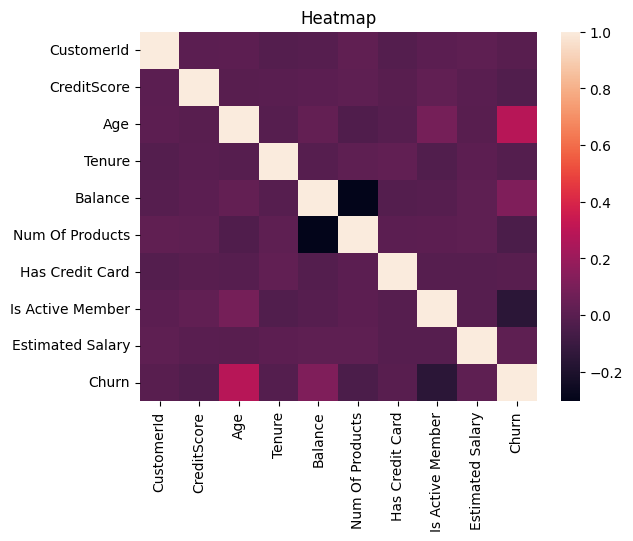

In [193]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix)
plt.title('Heatmap')
plt.show()

## **Data Preprocessing**

In [194]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [195]:
df.duplicated('CustomerId').sum()

0

In [196]:
df = df.set_index('CustomerId')


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [198]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [199]:
df.replace({'Geography': {'France': 0, 'Germany': 1, 'Spain': 2}}, inplace = True)

In [200]:
df.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace = True)

In [201]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [202]:
df = df.replace({'Num Of Products': {1:0, 2:1,3:1,4:1 }})

In [203]:
df['Balance'].value_counts()

0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance, Length: 6382, dtype: int64

In [204]:
df.loc[df['Balance'] == 0, 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [205]:
df['Zero Balance'] = np.where(df['Balance']> 0,1,0)

<Axes: >

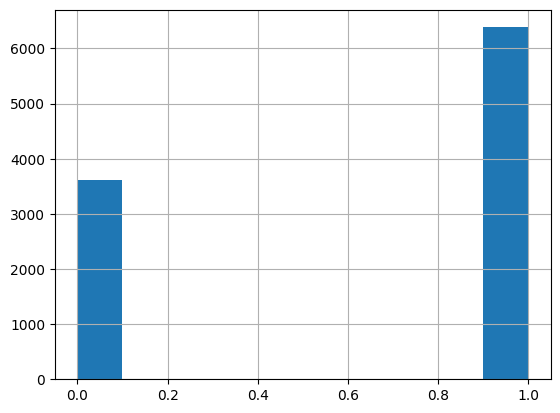

In [206]:
df['Zero Balance'].hist()

In [207]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             4204         4204    4204  4204    4204     4204   
      1             1695         1695    1695  1695    1695     1695   
      2             2064         2064    2064  2064    2064     2064   
1     0              810          810     810   810     810      810   
      1              814          814     814   814     814      814   
      2              413          413     413   413     413      413   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     4204             4204              4204   
      1                     1695             1695              1695   
      2                     2064             2064              2064   
1     0                      810              810               810   
      1                      814              814               814   
      2                      413              413               413   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      4204          4204  
      1                      1695          1695  
      2                      2064          2064  
1     0                       810           810  
      1                       814           814  
      2                       413           413

## **Define Target Variable (y) and Feature Variables (X)**

In [208]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [209]:
X = df.drop(['Surname' , 'Churn'], axis = 1)
y = df['Churn']

In [210]:
X.shape, y.shape

((10000, 11), (10000,))

## **Train Test Split**

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [213]:
from sklearn.svm import SVC

In [214]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [215]:
y_pred = model.predict(X_test)

## **Model Evaluation**

In [216]:
from sklearn.metrics import confusion_matrix , classification_report, precision_score, f1_score

In [217]:
confusion_matrix( y_test, y_pred)

array([[2377,    0],
       [ 623,    0]])

In [218]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2377
           1       0.00      0.00      0.00       623

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Prediction**

In [219]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## **Explaination**

The overall Accuracy of the model is 79%(Can be improved). Accuracy may change while using other models. Here Support Vector Classifier is used for prediction.